In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [3]:

!unzip /content/drive/MyDrive/neg.zip

Streaming output truncated to the last 5000 lines.
  inflating: neg/neg_612_8.jpg       
  inflating: neg/neg_612_9.jpg       
  inflating: neg/neg_613_0.jpg       
  inflating: neg/neg_613_1.jpg       
  inflating: neg/neg_613_2.jpg       
  inflating: neg/neg_613_3.jpg       
  inflating: neg/neg_613_4.jpg       
  inflating: neg/neg_613_5.jpg       
  inflating: neg/neg_613_6.jpg       
  inflating: neg/neg_614_0.jpg       
  inflating: neg/neg_614_1.jpg       
  inflating: neg/neg_614_2.jpg       
  inflating: neg/neg_614_3.jpg       
  inflating: neg/neg_614_4.jpg       
  inflating: neg/neg_614_5.jpg       
  inflating: neg/neg_615_0.jpg       
  inflating: neg/neg_615_1.jpg       
  inflating: neg/neg_615_2.jpg       
  inflating: neg/neg_615_3.jpg       
  inflating: neg/neg_615_4.jpg       
  inflating: neg/neg_615_5.jpg       
  inflating: neg/neg_616_0.jpg       
  inflating: neg/neg_616_1.jpg       
  inflating: neg/neg_616_2.jpg       
  inflating: neg/neg_616_3.jpg       

In [4]:

!unzip /content/drive/MyDrive/neu.zip

Streaming output truncated to the last 5000 lines.
  inflating: neu/neu_592_1.jpg       
  inflating: neu/neu_592_2.jpg       
  inflating: neu/neu_592_3.jpg       
  inflating: neu/neu_593_0.jpg       
  inflating: neu/neu_593_1.jpg       
  inflating: neu/neu_594_0.jpg       
  inflating: neu/neu_594_1.jpg       
  inflating: neu/neu_594_2.jpg       
  inflating: neu/neu_595_0.jpg       
  inflating: neu/neu_595_1.jpg       
  inflating: neu/neu_595_2.jpg       
  inflating: neu/neu_596_0.jpg       
  inflating: neu/neu_596_1.jpg       
  inflating: neu/neu_596_10.jpg      
  inflating: neu/neu_596_11.jpg      
  inflating: neu/neu_596_12.jpg      
  inflating: neu/neu_596_13.jpg      
  inflating: neu/neu_596_14.jpg      
  inflating: neu/neu_596_15.jpg      
  inflating: neu/neu_596_2.jpg       
  inflating: neu/neu_596_3.jpg       
  inflating: neu/neu_596_4.jpg       
  inflating: neu/neu_596_5.jpg       
  inflating: neu/neu_596_6.jpg       
  inflating: neu/neu_596_7.jpg       

In [5]:

!unzip /content/drive/MyDrive/pos.zip

Streaming output truncated to the last 5000 lines.
  inflating: pos/pos_511_0.jpg       
  inflating: pos/pos_512_0.jpg       
  inflating: pos/pos_512_1.jpg       
  inflating: pos/pos_512_2.jpg       
  inflating: pos/pos_512_3.jpg       
  inflating: pos/pos_512_4.jpg       
  inflating: pos/pos_512_5.jpg       
  inflating: pos/pos_512_6.jpg       
  inflating: pos/pos_512_7.jpg       
  inflating: pos/pos_512_8.jpg       
  inflating: pos/pos_512_9.jpg       
  inflating: pos/pos_513_0.jpg       
  inflating: pos/pos_513_1.jpg       
  inflating: pos/pos_514_0.jpg       
  inflating: pos/pos_514_1.jpg       
  inflating: pos/pos_514_2.jpg       
  inflating: pos/pos_515_0.jpg       
  inflating: pos/pos_515_1.jpg       
  inflating: pos/pos_515_10.jpg      
  inflating: pos/pos_515_11.jpg      
  inflating: pos/pos_515_12.jpg      
  inflating: pos/pos_515_13.jpg      
  inflating: pos/pos_515_14.jpg      
  inflating: pos/pos_515_15.jpg      
  inflating: pos/pos_515_16.jpg      

In [6]:
# Ignore warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data Manipulation libraries
import numpy as np
import pandas as pd

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

# Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import style
 
# Matplotlib configuration
%matplotlib inline  
style.use('fivethirtyeight')

# Keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import LambdaCallback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Dropout, Flatten, Activation, Reshape, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import PReLU
from keras.utils.data_utils import get_file

# Tensorflow
import tensorflow as tf

# Image manipulation libraries
import cv2                  
from PIL import Image

# Other libraries
import random
from tqdm import tqdm
import os
import itertools

# Set seed for random number generators
np.random.seed(42)
random.seed(42)
tf.set_random_seed(42)

Using TensorFlow backend.


In [7]:
# data
X = []
# labels
X_labels = []

# size of the image - 64x64
IMG_SIZE = 64

# assign variables for paths of each class
POSITIVE_DIR = 'pos/'
NEUTRAL_DIR = 'neu/'
NEGATIVE_DIR = 'neg/'

In [8]:

def generate_data_from_images(emotion_type, directory):
  # tqdm used for progress bar
  # for each image in the specified directory
  for image in tqdm(os.listdir(directory)):
    filename = os.fsdecode(image)
    if filename.endswith(".jpg"): 
      # read the colored image
      image = cv2.imread(os.path.join(directory, image))
      # resize image to 64x64
      image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
      
      # append the image as a numpy array to X
      X.append(np.array(image))
      # append the label to Z
      X_labels.append(emotion_type)

In [9]:

generate_data_from_images('Positive', POSITIVE_DIR)

100%|██████████| 17512/17512 [00:04<00:00, 3713.04it/s]


In [10]:
generate_data_from_images('Neutral', NEUTRAL_DIR)

100%|██████████| 9999/9999 [00:02<00:00, 3764.58it/s]


In [11]:
generate_data_from_images('Negative', NEGATIVE_DIR)

100%|██████████| 9218/9218 [00:02<00:00, 3819.31it/s]


In [12]:
len(X), len(X_labels)

(36729, 36729)

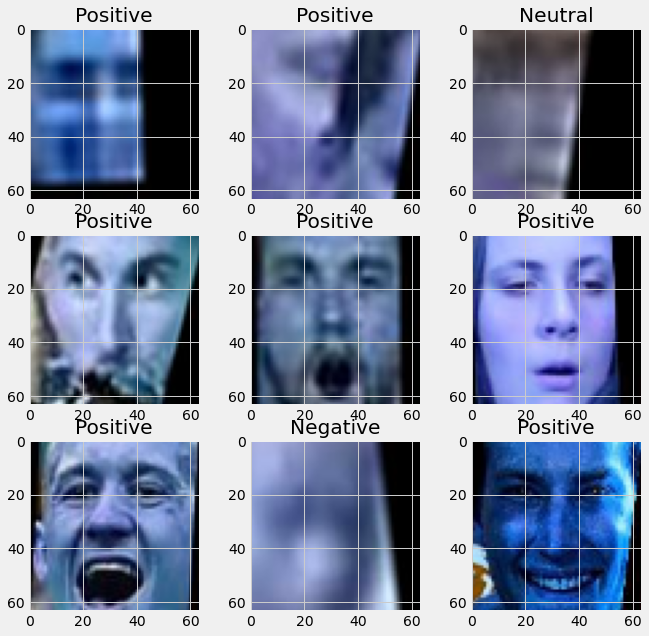

In [13]:
cols = 3
rows = 3
fig, axis = plt.subplots(rows, cols)
fig.set_size_inches(10, 10)
for i in range(rows):
  for j in range(cols):
    image_index = random.randint(0, len(X))
    axis[i, j].imshow(X[image_index])
    axis[i, j].set_title(X_labels[image_index])

In [14]:
# initialize the label encoder class
labelencoder = LabelEncoder()

# Convert the 3 classes "positive", "neutral" and "negative" into corresponding 
# numerical classes - 2, 1 and 0.
Y = labelencoder.fit_transform(X_labels)
# Check the classes applied by the Label Encoder
labelencoder_classes = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(labelencoder_classes)
# Apply one-hot encoding to convert the label encoded categorical data
# into multiple columns where each numerical class is replaced by 0 or 1
Y = to_categorical(Y,3)

# Convert X into a numpy array
X = np.array(X)
# Normalize all the pixel values for each image by diving by 255
X = X/255

{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (11,11),padding = 'Same',activation ='relu', input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3, activation = "softmax"))

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [17]:
batch_size=128

In [18]:
# define the data generator
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zoom_range = 0.1, 
        vertical_flip=False)

# fit on our training set
datagen.fit(X_train)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        23296     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [20]:
# get the position of the largest value for each label in y_train
# eg - argmax([0., 0., 1.]) = 2
y_ints = [y.argmax() for y in y_train]
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_ints), y_ints)

In [21]:
callbacks = []
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
callbacks.append(earlystop)

# history = model.fit(X_train,y_train, nb_epoch=400, \
#             batch_size=batch_size, \
#             validation_split=0.2, \
#             shuffle=True, verbose=1, \
#             callbacks=callbacks, class_weight=class_weights)

history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = 400, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size, callbacks=callbacks, class_weight=class_weights)


Epoch 1/400
229/229 [==============================] - 726s 3s/step - loss: 1.0063 - accuracy: 0.4986 - val_loss: 0.9595 - val_accuracy: 0.5197
Epoch 2/400
229/229 [==============================] - 726s 3s/step - loss: 0.9321 - accuracy: 0.5419 - val_loss: 0.9123 - val_accuracy: 0.5448
Epoch 3/400
229/229 [==============================] - 725s 3s/step - loss: 0.9050 - accuracy: 0.5596 - val_loss: 0.8998 - val_accuracy: 0.5543
Epoch 4/400
229/229 [==============================] - 725s 3s/step - loss: 0.8782 - accuracy: 0.5764 - val_loss: 0.8916 - val_accuracy: 0.5591
Epoch 5/400
229/229 [==============================] - 728s 3s/step - loss: 0.8566 - accuracy: 0.5914 - val_loss: 0.8709 - val_accuracy: 0.5756
Epoch 6/400
229/229 [==============================] - 727s 3s/step - loss: 0.8330 - accuracy: 0.6064 - val_loss: 0.8781 - val_accuracy: 0.5756
Epoch 7/400
229/229 [==============================] - 727s 3s/step - loss: 0.8020 - accuracy: 0.6285 - val_loss: 0.8729 - val_accuracy

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-b2982f568ae6>", line 13, in <module>
    verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size, callbacks=callbacks, class_weight=class_weights)
  File "/tensorflow-1.15.2/python3.7/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/tensorflow-1.15.2/python3.7/keras/engine/training.py", line 1732, in fit_generator
    initial_epoch=initial_epoch)
  File "/tensorflow-1.15.2/python3.7/keras/engine/training_generator.py", line 251, in fit_generator
    verbose=0)
  File "/tensorflow-1.15.2/python3.7/keras/engine/training.py", line 1361, in evaluate
    callbacks=callbacks)
  File "/tensorflow-1.15.2/python3.7/keras/engine/training_arrays.py", line 449, in test_loop
    batch_outs = f(ins_batch)
  File "/tensorflow-1.15.2/python

KeyboardInterrupt: ignored

In [ ]:

# serialize model to JSON
model_json = model.to_json()
with open("vggface_adam.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("vggface_adam.h5")
print("Saved model to disk")

Saved model to disk


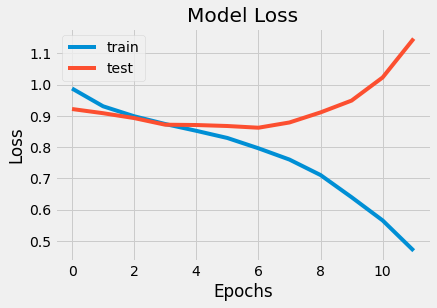

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

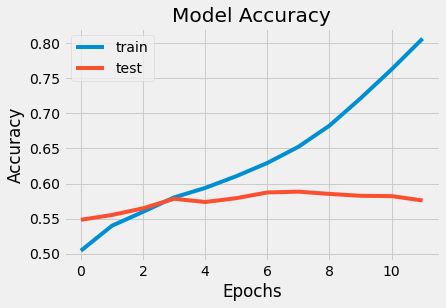

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Credit: https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
    """
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 677  455  725]
 [ 401 1004  621]
 [ 463  450 2550]]


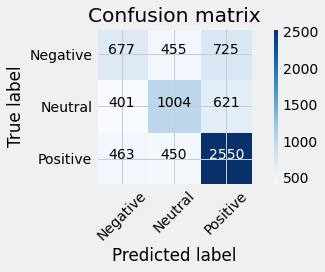

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure()
plot_confusion_matrix(cm, classes=labelencoder.classes_)
plt.show()

In [ ]:
accuracy_score(y_true, y_pred_classes)

0.5759597059624285